# Plot weekly sum of inmate positive cases across all PA SCI

In [119]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import timedelta
from io import StringIO, BytesIO

import warnings
warnings.filterwarnings('ignore')


In [120]:
doc_df = pd.read_csv('../data/latest_data/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [121]:
doc_df

,date.1,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,incarcerated_person_positive,incarcerated_person_negative,incarcerated_person_pending,...,test_transfer_positive_new,test_release_new,test_release_positive_new,test_hospital_new,test_hospital_positive_new,test_surveilance_new,test_surveilance_positive_new,test_symptomatic_new,test_symptomatic_positive_new,test_miscellaneous_new
date,,,,,,,,,,,,,,,,,,,,,
2020-04-07,2020-04-07,Rockview,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Albion,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Benner Township,NaN,4.0,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Cambridge Springs,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Camp Hill,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,2020-12-04,Retreat,4.0,10.0,1.0,NaN,4.0,13.0,1048.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-12-04,2020-12-04,Rockview,89.0,46.0,21.0,NaN,30.0,73.0,763.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-12-04,2020-12-04,Smithfield,87.0,133.0,20.0,NaN,51.0,63.0,510.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [122]:
cases_by_week = doc_df.resample('7D')['incarcerated_person_positive_new'].sum().to_frame()

<AxesSubplot:xlabel='date'>

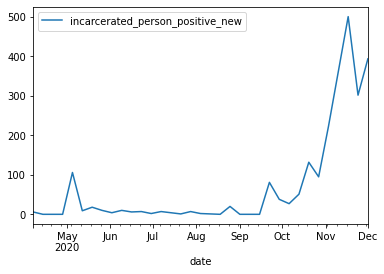

In [123]:
cases_by_week.plot()

## Create ggplot (plotnine) summary graph

In [124]:
from_week = cases_by_week.index.min().strftime('%d %b')
to_week = cases_by_week.index.max().strftime('%d %b')

In [125]:

ymax = int(round(cases_by_week.max()/100)*100)

ptitle = f'Weekly positive Covid19 cases in Pennsylvania prison\nfor weeks of {from_week} to {to_week}'



case_plot = (
    ggplot(cases_by_week) + 
    aes(x=cases_by_week.index, y='incarcerated_person_positive_new') + 
    geom_point(size=0, color='white') + 
    geom_smooth(se=False,method='loess',span=0.3, size=1.5, color='darkblue') +
    scale_x_datetime(breaks=date_breaks('1 months'), labels=date_format('%b')) + 
                    theme(panel_background = element_blank(), 
                          axis_title_y=element_text(size=10, color='darkblue'),
                          axis_text_y=element_line(color='darkblue'),
                          title=element_text(size=14),
                          axis_line_x=element_line(color='black', size=0.7),
                          axis_ticks_major_x=element_blank()
                         ) + 
                    ylim(0,ymax) +
                    ylab('Inmate Covid19 positive test result') + ggtitle(ptitle)
)

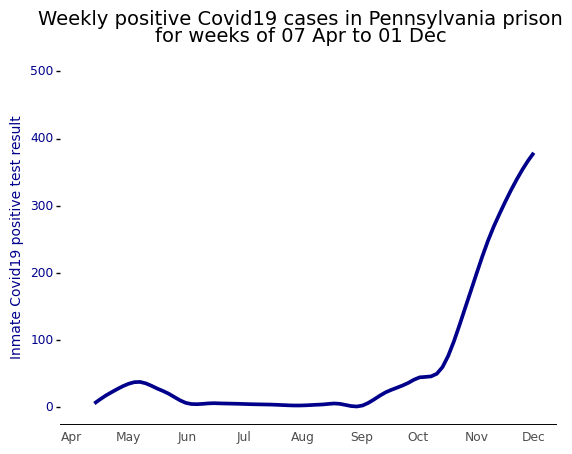

<ggplot: (318335997)>

In [126]:
case_plot

In [127]:
case_plot.save('../img/Covid19_cases_in_PA_SCI.svg')

### Sparklines for SCI

In [128]:
def plot_SCI_sparkline(df, SCI, rolling_avg=None):
    '''plot a sparkline for an SCI
    
    
    '''
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['incarcerated_person_positive_new'].sum()
    
    if rolling_avg:
        daily_ts=daily_ts.rolling(rolling_avg).mean()
    
    start=daily_ts.index.min().strftime('%b %d')
    end=daily_ts.index.max().strftime('%b %d')
    
    xmax = daily_ts.idxmax()
    ymax = daily_ts.max()
    
    if rolling_avg:
        ymax_str = f'{ymax:0.1f}'
    else:
        ymax_str = str(round(ymax))

    
    fig,ax=plt.subplots(figsize=(4,0.4))
    sci_plot= daily_ts.plot(ax=ax)
    my_xticks = ax.get_xticks()
    
    #sci_plot.set_axis_off()
    sci_plot.set_frame_on(False)
    sci_plot.get_yaxis().set_visible(False)
    sci_plot.get_xaxis().set_visible(True)
    
    sci_plot.set_xticks([my_xticks[0], my_xticks[-1]])
    sci_plot.set_xticklabels([start, end])
    sci_plot.xaxis.set_ticks_position('none') 
    sci_plot.set_xlabel(SCI)
    sci_plot.annotate(ymax_str, (xmax,ymax), color='red')
    
    sci_plot.axes.set_xlim(right=daily_ts.index.max()+timedelta(days=2))
    
    return fig

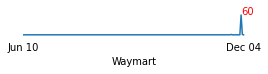

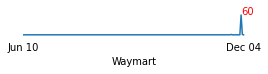

In [129]:
plot_SCI_sparkline(doc_df, 'Waymart', rolling_avg=None)

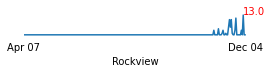

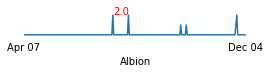

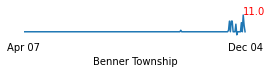

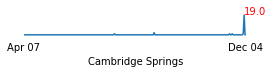

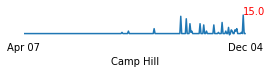

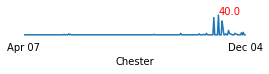

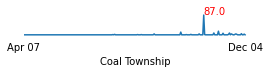

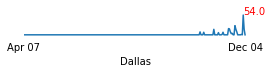

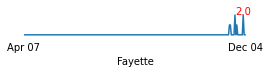

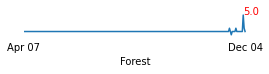

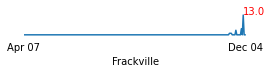

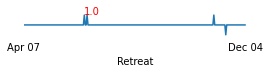

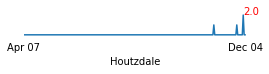

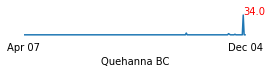

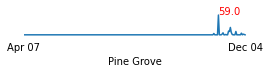

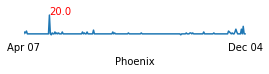

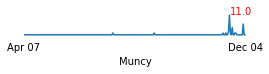

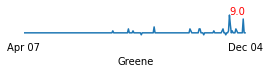

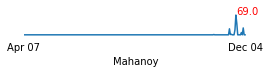

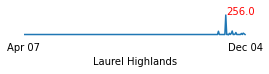

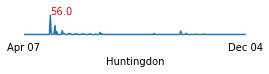

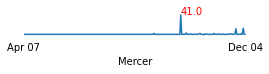

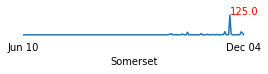

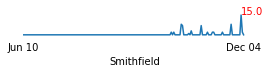

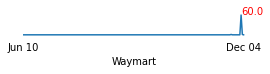

In [130]:
for SCI in doc_df['SCI'].unique():
    plot_SCI_sparkline(doc_df, SCI, rolling_avg='1D')

In [134]:
doc_df.loc['2020-12-03'][['SCI','incarcerated_person_positive_new']].sort_values('incarcerated_person_positive_new')

,SCI,incarcerated_person_positive_new
date,,
2020-12-03,Albion,0.0
2020-12-03,Rockview,0.0
2020-12-03,Retreat,0.0
2020-12-03,Quehanna BC,0.0
2020-12-03,Phoenix,0.0
2020-12-03,Muncy,0.0
2020-12-03,Mahanoy,0.0
2020-12-03,Houtzdale,0.0
2020-12-03,Greene,0.0


<AxesSubplot:xlabel='date'>

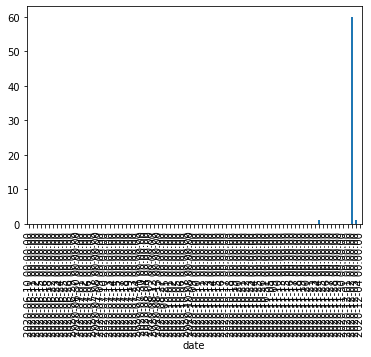

In [132]:
doc_df[doc_df['SCI']=='Waymart']['incarcerated_person_positive_new'].plot(kind='bar')

In [154]:
d1=doc_df.loc['2020-12-03'].reset_index()[cols_for_comparison]
d2=doc_df.loc['2020-12-04'].reset_index()[cols_for_comparison]

In [156]:
d1.equals(d2)

False

In [158]:
d1.head()

,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,incarcerated_person_positive,incarcerated_person_negative,incarcerated_person_pending,incarcerated_person_death,...,test_transfer_positive,test_release,test_release_positive,test_hospital,test_hospital_positive,test_surveilance,test_surveilance_positive,test_symptomatic,test_symptomatic_positive,test_miscellaneous
0,Albion,24.0,26.0,33.0,NaN,2.0,10.0,468.0,157.0,NaN,...,2.0,329.0,3.0,113.0,5.0,2.0,0.0,4.0,0.0,NaN
1,Benner Township,56.0,56.0,71.0,NaN,45.0,48.0,389.0,111.0,1.0,...,0.0,267.0,4.0,18.0,2.0,90.0,14.0,35.0,28.0,NaN
2,Cambridge Springs,11.0,17.0,9.0,NaN,1.0,26.0,556.0,89.0,NaN,...,0.0,427.0,4.0,23.0,1.0,79.0,1.0,29.0,20.0,NaN
3,Camp Hill,102.0,93.0,58.0,1.0,63.0,115.0,4383.0,2819.0,1.0,...,32.0,581.0,7.0,24.0,4.0,799.0,60.0,25.0,10.0,NaN
4,Chester,120.0,28.0,69.0,NaN,38.0,163.0,720.0,183.0,4.0,...,6.0,449.0,21.0,13.0,6.0,170.0,28.0,107.0,100.0,NaN


In [159]:
d2.head()

,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,incarcerated_person_positive,incarcerated_person_negative,incarcerated_person_pending,incarcerated_person_death,...,test_transfer_positive,test_release,test_release_positive,test_hospital,test_hospital_positive,test_surveilance,test_surveilance_positive,test_symptomatic,test_symptomatic_positive,test_miscellaneous
0,Albion,25.0,26.0,33.0,NaN,2.0,10.0,468.0,157.0,NaN,...,2.0,329.0,3.0,113.0,5.0,2.0,0.0,4.0,0.0,NaN
1,Benner Township,63.0,56.0,71.0,NaN,45.0,48.0,389.0,111.0,1.0,...,0.0,267.0,4.0,18.0,2.0,90.0,14.0,35.0,28.0,NaN
2,Cambridge Springs,14.0,17.0,9.0,NaN,1.0,26.0,556.0,89.0,NaN,...,0.0,427.0,4.0,23.0,1.0,79.0,1.0,29.0,20.0,NaN
3,Camp Hill,106.0,93.0,58.0,1.0,63.0,115.0,4383.0,2819.0,1.0,...,32.0,581.0,7.0,24.0,4.0,799.0,60.0,25.0,10.0,NaN
4,Chester,120.0,28.0,69.0,NaN,38.0,163.0,720.0,183.0,4.0,...,6.0,449.0,21.0,13.0,6.0,170.0,28.0,107.0,100.0,NaN


In [179]:
pd.DataFrame(zip(d1['staff_positive'],d2['staff_positive']))

,0,1
0,24.0,25.0
1,56.0,63.0
2,11.0,14.0
3,102.0,106.0
4,120.0,120.0
5,35.0,39.0
6,143.0,153.0
7,19.0,24.0
8,19.0,21.0
9,22.0,26.0


In [171]:
for c in cols_for_comparison:
    print(c, d1[c].equals(d2[c]))

SCI True
staff_positive False
staff_negative True
staff_pending True
staff_death True
staff_recovered True
incarcerated_person_positive True
incarcerated_person_negative True
incarcerated_person_pending True
incarcerated_person_death True
incarcerated_person_recovered True
test_transfer True
test_transfer_positive True
test_release True
test_release_positive True
test_hospital True
test_hospital_positive True
test_surveilance True
test_surveilance_positive True
test_symptomatic True
test_symptomatic_positive True
test_miscellaneous True


In [142]:
cols_for_comparison = [c for c in doc_df.columns if not c.endswith('_new') and c!='date.1']

In [143]:
cols_for_comparison

['SCI',
 'staff_positive',
 'staff_negative',
 'staff_pending',
 'staff_death',
 'staff_recovered',
 'incarcerated_person_positive',
 'incarcerated_person_negative',
 'incarcerated_person_pending',
 'incarcerated_person_death',
 'incarcerated_person_recovered',
 'test_transfer',
 'test_transfer_positive',
 'test_release',
 'test_release_positive',
 'test_hospital',
 'test_hospital_positive',
 'test_surveilance',
 'test_surveilance_positive',
 'test_symptomatic',
 'test_symptomatic_positive',
 'test_miscellaneous']